In [1]:
#In this we will read the .csv file generated by RMG.Py's plotting function. Specifically we will be able to generate a 
#plot of the important species and numerically calculate things like selectivity

In [33]:
from rmgpy.species import Species
import matplotlib.pyplot as plt
import pandas
import os.path
import numpy as np
%matplotlib inline

In [34]:
#list(data)

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix wi

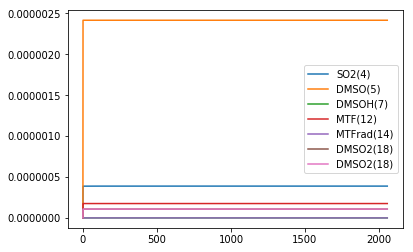

In [35]:
#This cell will generate plots of the species I care about
data = pandas.read_csv('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/solver/simulation_1_41.csv')
data_mat = data.as_matrix()
#list(data)
#xvar = data.iloc[:,0]
#xvar_mat = xvar.as_matrix()
#print(xvar_mat)
#list(data.columns
for i in range(len(list(data))):
    if 'Time' in list(data)[i]:
        xvar = data.iloc[:,i]
        xvar_mat = xvar.as_matrix()
    if 'DMSO' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        plt.plot(xvar_mat, yvar1_mat, label=list(data)[i])
    if 'SO2' in list(data)[i]:
        yvar2 = data.iloc[:,i]
        yvar2_mat = yvar2.as_matrix()
        plt.plot(xvar_mat, yvar2_mat, label=list(data)[i])
    if 'MTF' in list(data)[i]:
        yvar3 = data.iloc[:,i]
        yvar3_mat = yvar3.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
#    if 'CSO' in list(data)[i]:
#        yvar4 = data.iloc[:,i]
#        yvar4_mat = yvar4.as_matrix()
#        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
plt.legend()
#data.plot(x='Time (s)', y='DMSO(6)')
#data.plot(x='Time (s)', y='SO2(23)')
    

In [36]:
#This cell will calculate the final selectivities toward each of the products
for i in range(len(list(data))):
    if 'DMS(1)' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        DMS_init = yvar1_mat[0]
        DMS_final = yvar1_mat[-1]
        Delta_DMS = DMS_init - DMS_final
        DMS_index = i
        
for i in range(len(list(data))):
    yvar1 = data.iloc[:,i]
    yvar1_mat = yvar1.as_matrix()
    final_mole_fraction = yvar1_mat[-1]
    print str(list(data)[i]) + ': ' + str(final_mole_fraction/Delta_DMS)
        

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


Time (s): 418840525.647
Volume (m^3): 4404.31712139
N2: 161961.117405
Ne: 0.0
DMS(1): 2.05610078882
HOOH(2): 2.32900588378
OH(3): 4.54479125593e-14
SO2(4): 0.0792572741829
DMSO(5): 0.49253157112
O2(6): 41767.2947398
DMSOH(7): 6.46929562484e-19
OOH(8): 1.02306854825e-10
C2H5O2S(9): 3.25653210858e-07
C2H5OS(10): 5.4523919969e-22
CSCOH(11): 0.0389499575875
MTF(12): 0.0358123048861
CH3(13): 3.1346792496e-15
MTFrad(14): 5.08693471203e-21
CH4(15): 9.57946056076e-05
H2O(16): 3.01847666549
S(17): 4.22065685104e-41
DMSO2(18): 0.0219893929906
CSrad(19): 1.42636808478e-11
CH3O2S(20): 5.56854985961e-12
CH2S(21): 0.203419785661
CSOrad(22): 2.08656630386e-12
O(23): 4.07197629933e-22
CH3O2S(24): 3.31986180717e-16
CH2O3(25): 0.0
CO2(26): 0.0
H(27): 2.85512225091e-24
CH2O(36): 0.408989638764
C2H5S(53): 2.04557885626e-17
CH3SH(54): 0.125997684697
S(83): 1.16666551992e-12
C2H3OS(98): 1.42929770667e-17
COS(101): 0.00204167815384
COO(149): 0.0561035209232
CH3O2(177): 0.0247847426067
CH3O2(199): 4.822380624

In [25]:
#This will automatically generate the temperature and O2 comparison plots based on a certain model
index = 54
#Read in the base input file
inputpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/input.py' 
with open(inputpath) as f:
    log = f.read().splitlines()
#Reference the base chem.inp and species dictionary
chempath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/chem_annotated.inp'
dictpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/species_dictionary.txt'
#make a new directory for the various input files and new .csv files
basepath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/ExperimentalComparisons'
os.makedirs(basepath)

T_vec = [260, 270, 280, 290, 298]
O2_vec = [0, 200, 500]
N2_vec = [0.99994, 0.79994, 0.49994]

#write each of the 15 input files to their own folder in the Experimental Comparisons Folder
#Loop over temperatures
for j in range(len(T_vec)):
    #Loop over Oxygen content
    for k in range(len(O2_vec)):
        basepath2 = basepath + '/' + str(T_vec[j]) + '_' + str(O2_vec[k])
        os.makedirs(basepath2)
        filename = os.path.join(basepath2, 'input_'+ str(T_vec[j]) + '_' + str(O2_vec[k]) + '.py')
        file = open(filename, 'wb')
        for n in xrange(len(log)):
            if 'temperature=(' in log[n]:
                file.write('    temperature=(' + str(T_vec[j]) + ',\'K\'),\n')
            elif '"O2":' in log[n]:
                file.write('        "O2": 0.' + str(O2_vec[k]) +',\n')
            elif '"N2":' in log[n]:
                file.write('        "N2": ' + str(N2_vec[k]) + ',\n')
            else:
                file.write(log[n] + '\n')
        file.close()
#Run the input files with the simulate script
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_0/input_260_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_200/input_260_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_500/input_260_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_0/input_270_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_200/input_270_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_500/input_270_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_0/input_280_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_200/input_280_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_500/input_280_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_0/input_290_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_200/input_290_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_500/input_290_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_0/input_298_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_200/input_298_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_500/input_298_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt

#Compare the DMSO, SO2, DMSO2, MTF, and OCS concentration to experiments

Using Theano backend.
Simulation took 8.58993911743 seconds
Using Theano backend.
Simulation took 9.20152711868 seconds
Using Theano backend.
Simulation took 15.0446841717 seconds
Using Theano backend.
Simulation took 12.5842521191 seconds
Using Theano backend.
Simulation took 6.14847612381 seconds
Using Theano backend.
Simulation took 6.47842288017 seconds
Using Theano backend.
Simulation took 7.45314598083 seconds
Using Theano backend.
Simulation took 9.05724692345 seconds
Using Theano backend.
Simulation took 6.18812322617 seconds
Using Theano backend.
Simulation took 7.44310998917 seconds
Using Theano backend.
Simulation took 7.31311416626 seconds
Using Theano backend.
Simulation took 7.29489183426 seconds
Using Theano backend.
Simulation took 5.63447880745 seconds
Using Theano backend.
Simulation took 7.78860998154 seconds
Using Theano backend.
Simulation took 7.57219314575 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:53:

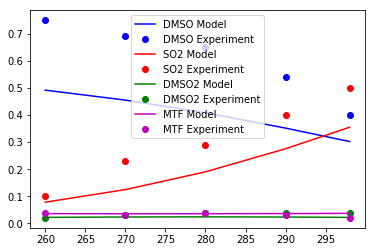

In [52]:
#This will read the .csv files generated above and create comparison plots for DMSO, SO2, DMSO2, MTF, and OCS
Tvec = [260, 270, 280, 290, 298]
Pvec = [0, 200, 500]

DMSO_exp = np.zeros((3,5))
DMSO_model = np.zeros((3,5))
DMSO_exp[1][:] = [0.75, 0.69, 0.65, 0.54, 0.4]

SO2_exp = np.zeros((3,5))
SO2_model = np.zeros((3,5))
SO2_exp[1][:] = [0.1, 0.23, 0.29, 0.4, 0.5]

DMSO2_exp = np.zeros((3,5))
DMSO2_model = np.zeros((3,5))
DMSO2_exp[1][:] = [0.02, 0.03, 0.04, 0.04, 0.04]

MTF_exp = np.zeros((3,5))
MTF_model = np.zeros((3,5))
MTF_exp[1][:] = [0.04, 0.03, 0.04, 0.03, 0.02]

OCS_exp = np.zeros((3,5))
OCS_model = np.zeros((3,5))

#Fill in the matrices
#Loop over temperature
for j in range(len(T_vec)):
    #Loop over Oxygen content
    for k in range(len(O2_vec)):  
        data = pandas.read_csv(basepath + '/' + str(T_vec[j]) + '_' + str(O2_vec[k]) + '/solver/simulation_1_41.csv')
        data_mat = data.as_matrix()
        i = 0
        for i in range(len(list(data))):
            if 'DMS(1)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                DMS_init = yvar1_mat[0]
                DMS_final = yvar1_mat[-1]
                Delta_DMS = DMS_init - DMS_final
                DMS_index = i
        for i in range(len(list(data))):
            if 'DMSO(5)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'SO2(4)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                SO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'DMSO2(18)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'MTF(12)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                MTF_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'COS(101)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                OCS_model[k][j] = final_mole_fraction/Delta_DMS

#plot the temperature variance at constant 200 mbar O2 
plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')

plt.plot(Tvec, SO2_model[1][:], 'r', label='SO2 Model')
plt.plot(Tvec, SO2_exp[1][:], 'ro', label='SO2 Experiment')

plt.plot(Tvec, DMSO2_model[1][:], 'g', label='DMSO2 Model')
plt.plot(Tvec, DMSO2_exp[1][:], 'go', label='DMSO2 Experiment')

plt.plot(Tvec, MTF_model[1][:], 'm', label='MTF Model')
plt.plot(Tvec, MTF_exp[1][:], 'mo', label='MTF Experiment')

#plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
#plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')
plt.legend()

In [30]:
DMSO_exp = np.zeros((3,5))